In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("technographics.csv")

# Clean and prepare
df.replace("\\N", pd.NA, inplace=True)
df['last_date_found'] = pd.to_datetime(df['last_date_found'], errors='coerce')

# Copy to avoid modifying original
df_viz = df.copy()

sns.set(style="whitegrid")


 1. Bar Plot – Top 10 Technologies by Job Mentions


<ipython-input-3-33ada5f10a5e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_techs, y='keyword_slug', x='jobs_last_30_days', palette='viridis')


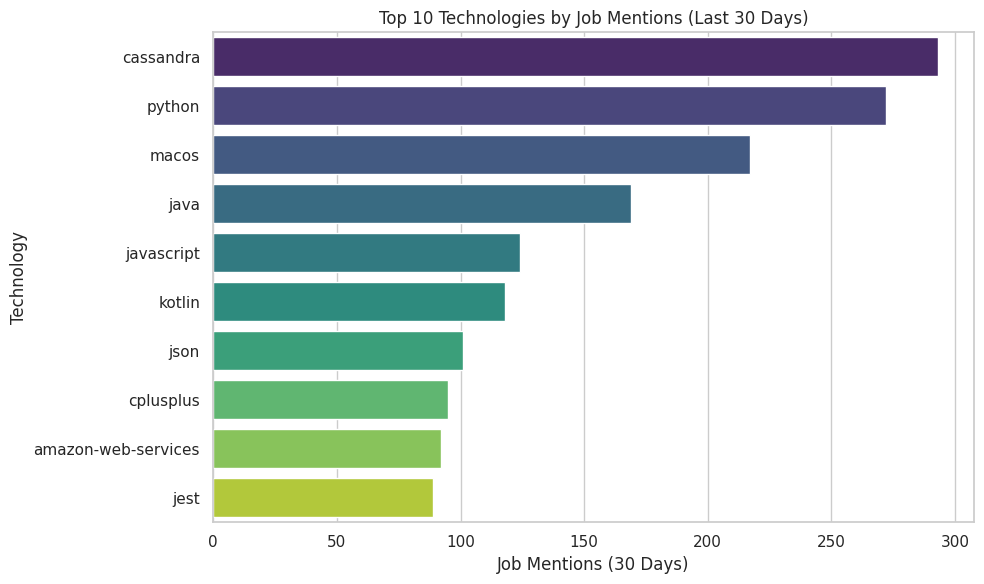

In [3]:
top_techs = (df_viz.groupby('keyword_slug')['jobs_last_30_days']
             .sum()
             .sort_values(ascending=False)
             .head(10)
             .reset_index())

plt.figure(figsize=(10, 6))
sns.barplot(data=top_techs, y='keyword_slug', x='jobs_last_30_days', palette='viridis')
plt.title('Top 10 Technologies by Job Mentions (Last 30 Days)')
plt.xlabel('Job Mentions (30 Days)')
plt.ylabel('Technology')
plt.tight_layout()
plt.show()


2. Pie Chart – Share of Technologies

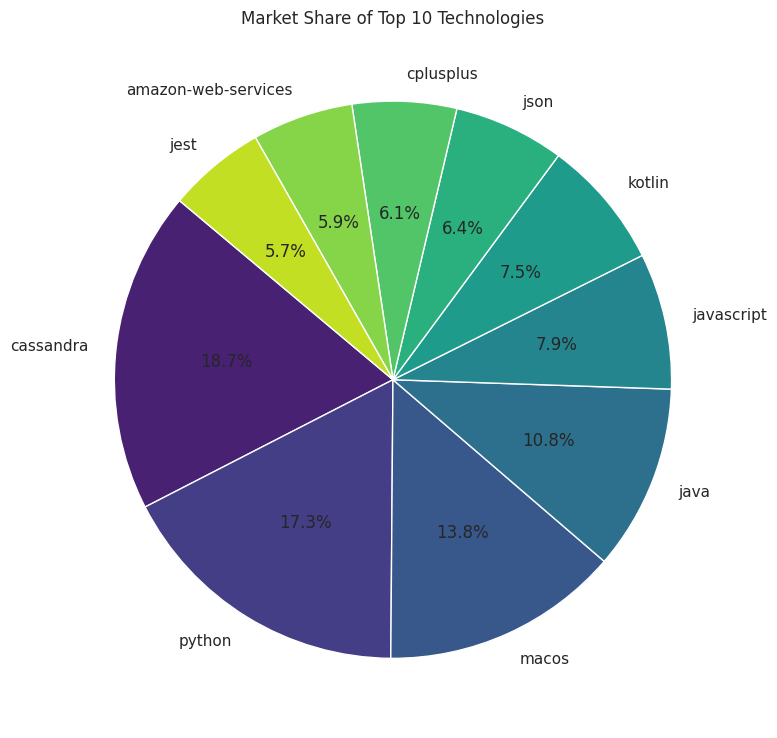

In [4]:
plt.figure(figsize=(8, 8))
plt.pie(top_techs['jobs_last_30_days'], labels=top_techs['keyword_slug'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_techs)))
plt.title('Market Share of Top 10 Technologies')
plt.tight_layout()
plt.show()


3. Line Plot – Rank Trend of a Specific Technology

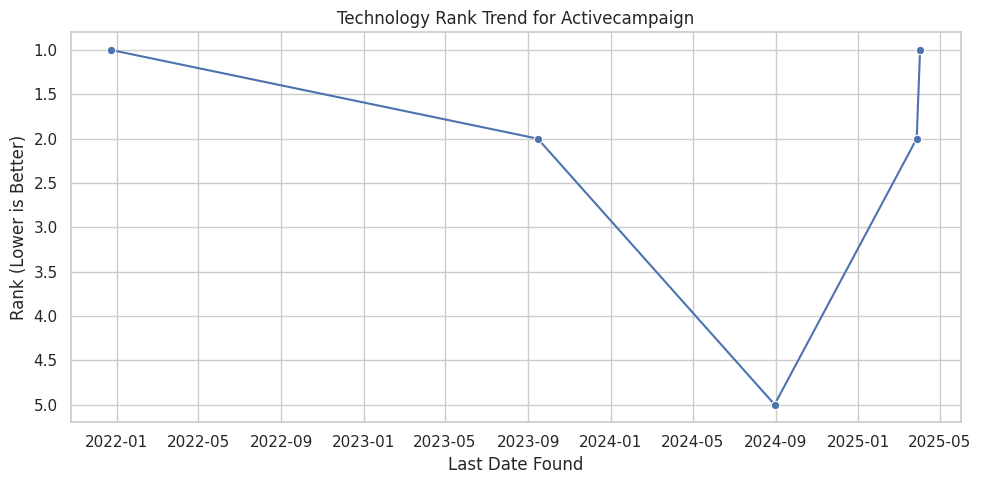

In [5]:
tech_name = 'activecampaign'  # Change this to any technology
tech_df = df_viz[df_viz['keyword_slug'] == tech_name]

plt.figure(figsize=(10, 5))
sns.lineplot(data=tech_df, x='last_date_found', y='technology_rank_source_jobs', marker='o')
plt.gca().invert_yaxis()
plt.title(f'Technology Rank Trend for {tech_name.title()}')
plt.xlabel('Last Date Found')
plt.ylabel('Rank (Lower is Better)')
plt.tight_layout()
plt.show()


4. Box Plot – Job Mentions Distribution by Confidence

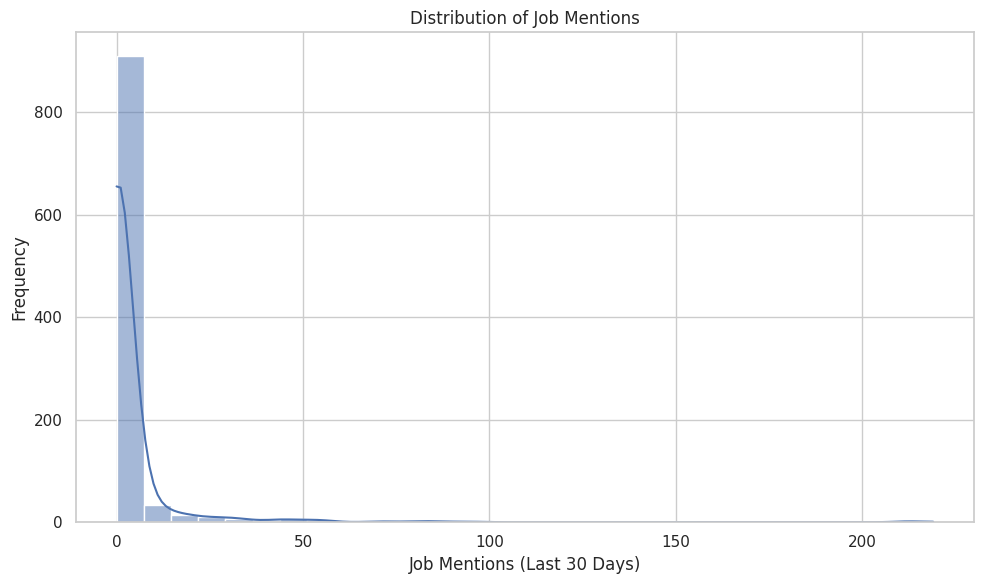

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_viz['jobs_last_30_days'], bins=30, kde=True)
plt.title('Distribution of Job Mentions')
plt.xlabel('Job Mentions (Last 30 Days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


 5. Scatter Plot – Rank vs Job Mentions

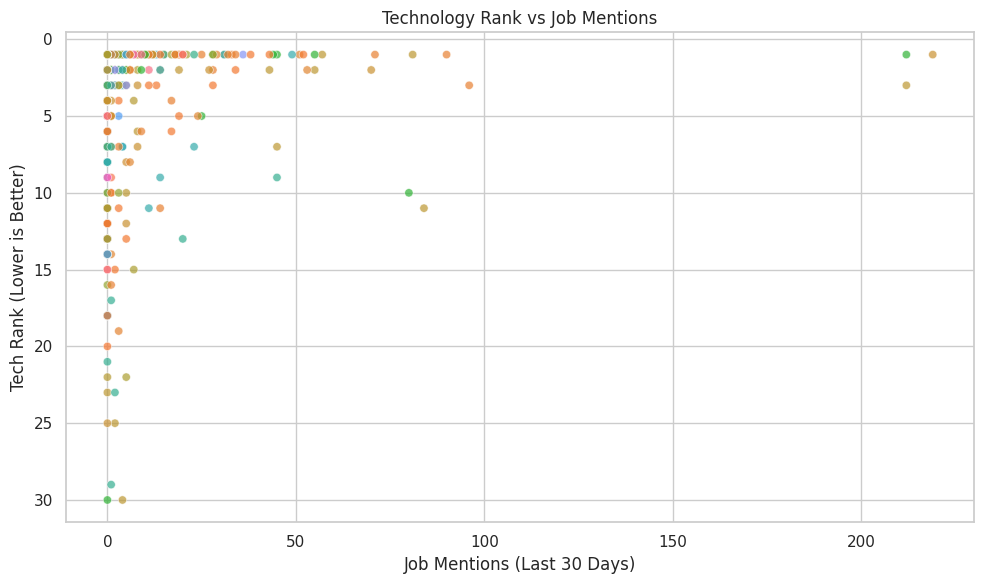

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='jobs_last_30_days', y='technology_rank_source_jobs', hue='company_name', alpha=0.7, legend=False)
plt.gca().invert_yaxis()
plt.title('Technology Rank vs Job Mentions')
plt.xlabel('Job Mentions (Last 30 Days)')
plt.ylabel('Tech Rank (Lower is Better)')
plt.tight_layout()
plt.show()


 6. Heatmap – Technology Use Across Top Companies

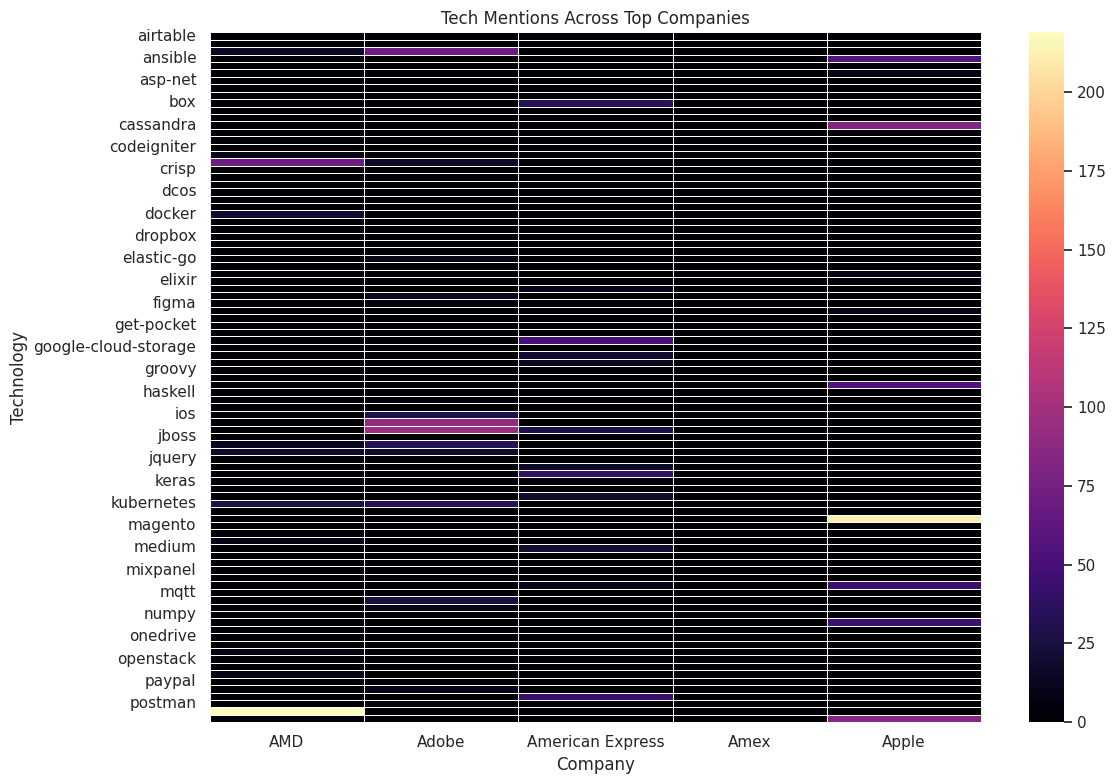

In [10]:
top_companies = df_viz['company_name'].value_counts().nlargest(5).index
subset = df_viz[df_viz['company_name'].isin(top_companies)]

heatmap_data = subset.pivot_table(index='keyword_slug', columns='company_name', values='jobs_last_30_days', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap='magma', linewidths=0.5)
plt.title('Tech Mentions Across Top Companies')
plt.xlabel('Company')
plt.ylabel('Technology')
plt.tight_layout()
plt.show()


 7. Pairplot – Relationships Between Key Metrics

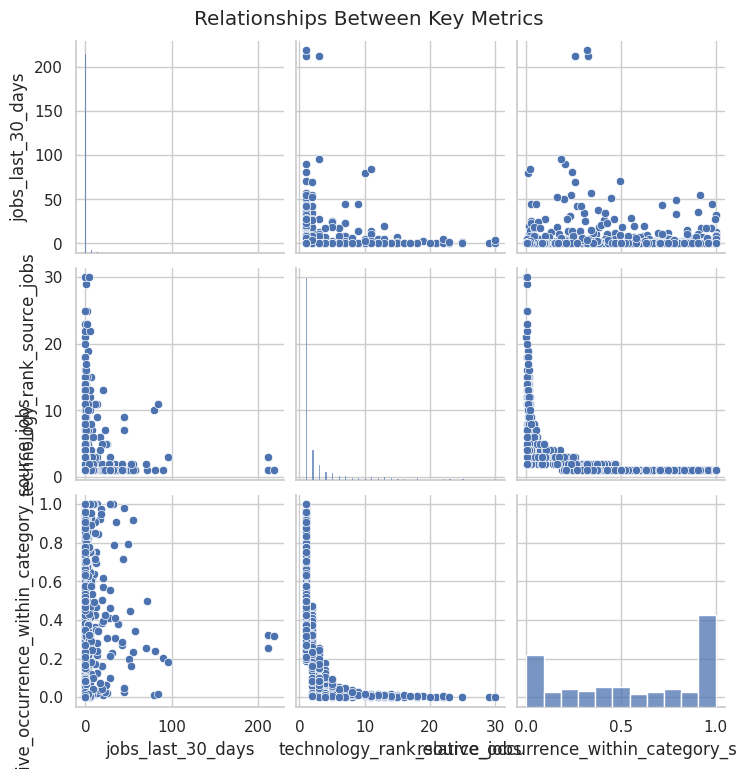

In [11]:
metrics_df = df_viz[['jobs_last_30_days', 'technology_rank_source_jobs', 'relative_occurrence_within_category_source_jobs']].dropna()
sns.pairplot(metrics_df)
plt.suptitle('Relationships Between Key Metrics', y=1.02)
plt.show()


8.Area Chart – Job Mentions Over Time

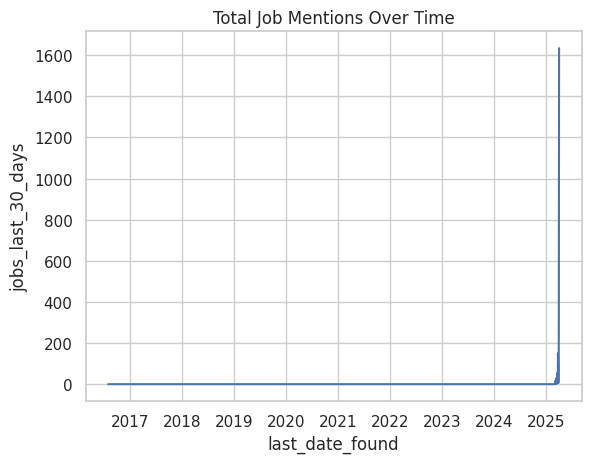

In [12]:
df_viz['last_date_found'] = pd.to_datetime(df_viz['last_date_found'], errors='coerce')
timeline = df_viz.groupby('last_date_found')['jobs_last_30_days'].sum().reset_index()
sns.lineplot(data=timeline, x='last_date_found', y='jobs_last_30_days')
plt.fill_between(timeline['last_date_found'], timeline['jobs_last_30_days'], alpha=0.4)
plt.title("Total Job Mentions Over Time")
plt.show()
